Two Rotating Gears (Two classes. Bidimensional).
100 batches of 1900 instances



METHOD: Static lp as classifier
Execution time:  6.373193923785392
Average MCC:  0.895710330616
Average macro-F1: 0.947499971358021
Average Accuracy:  94.5702
Standard Deviation:  3.90219706832
Variance:  15.22714196


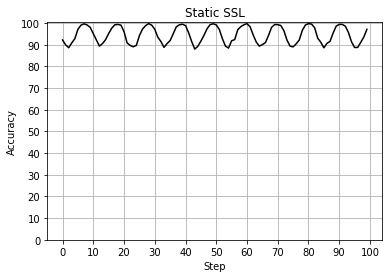

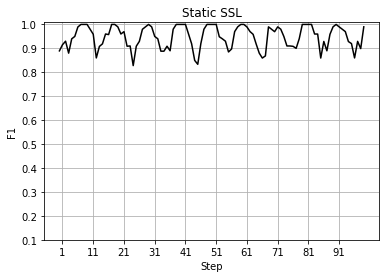




METHOD: Sliding lp as classifier
Execution time:  6.353339282970014
Average MCC:  0.991573244786
Average macro-F1: 0.9957511505535451
Average Accuracy:  99.1943
Standard Deviation:  1.09236647239
Variance:  1.19326451


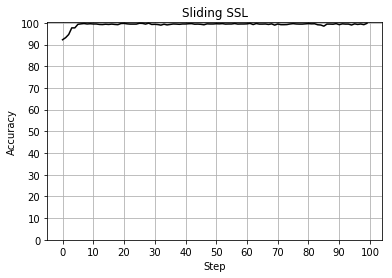

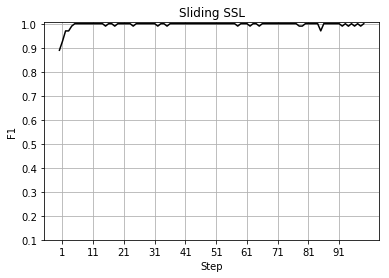




METHOD: Incremental lp as classifier
Execution time:  270.1694773366645
Average MCC:  0.897658513121
Average macro-F1: 0.9485283603322759
Average Accuracy:  94.6714
Standard Deviation:  3.74763179088
Variance:  14.04474404


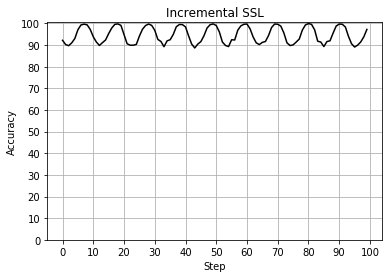

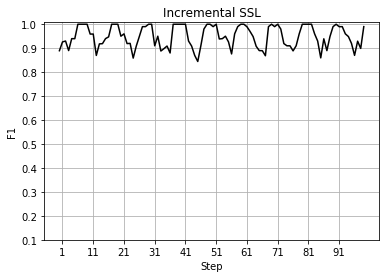




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  42.07669737485122
Average MCC:  0.991573244786
Average macro-F1: 0.9957511505535451
Average Accuracy:  99.1928
Standard Deviation:  1.09312861091
Variance:  1.19493016


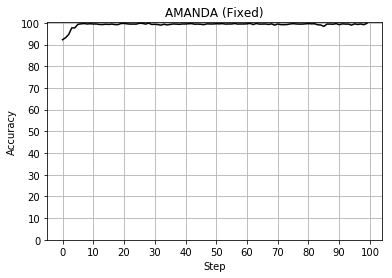

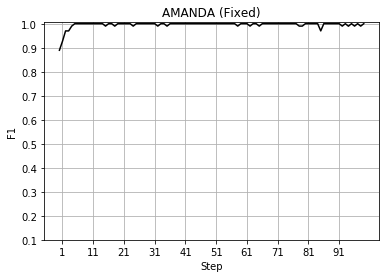




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  35.93575617077272
Average MCC:  0.927757864667
Average macro-F1: 0.963005009340767
Average Accuracy:  96.2639
Standard Deviation:  1.2215882244
Variance:  1.49227779


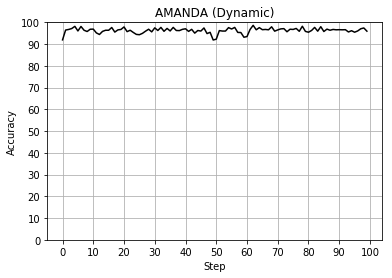

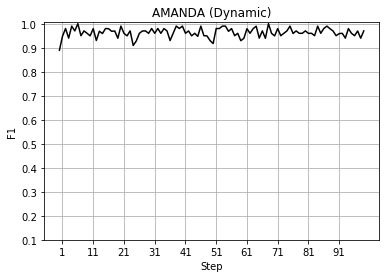




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  50.40803603915384
Average MCC:  0.928461531371
Average macro-F1: 0.9637753141535466
Average Accuracy:  95.9757
Standard Deviation:  1.2956776258
Variance:  1.67878051


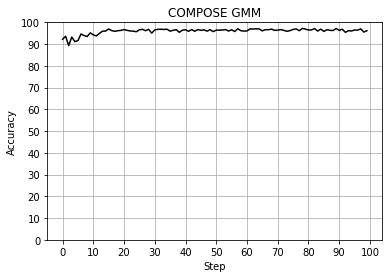

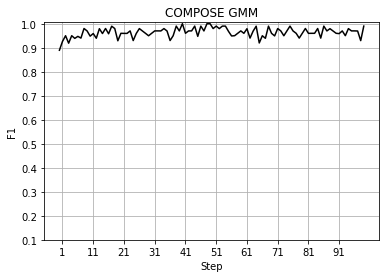




Method: Level IW
Execution time:  50.40803603915384
Average MCC:  0.02028468886
Average macro-F1: 0.5075670763219232
Average Accuracy:  93.824211
Standard Deviation:  2.54734633436
Variance:  6.48897334718


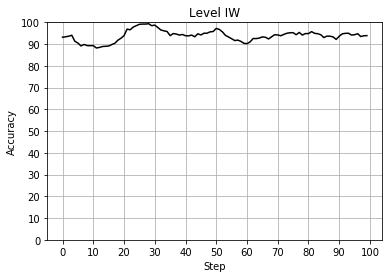

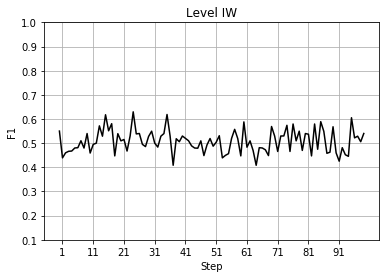

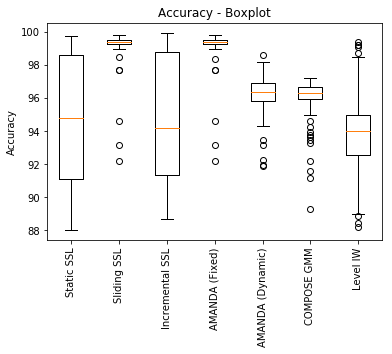

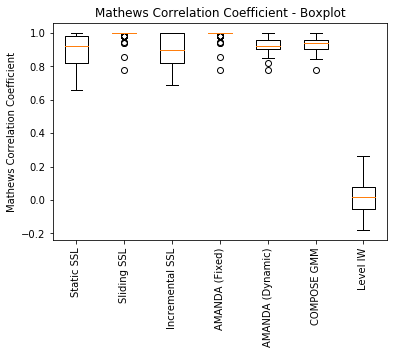

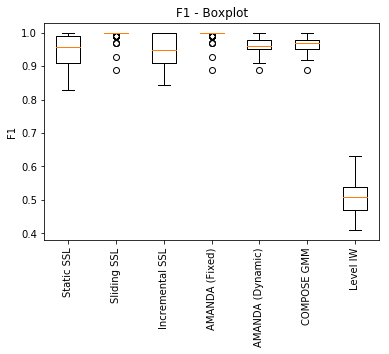

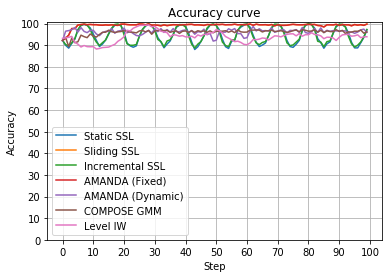

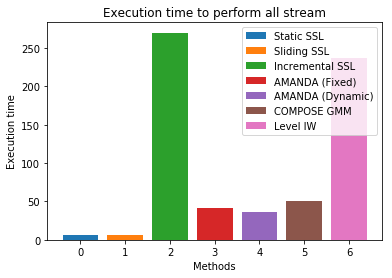

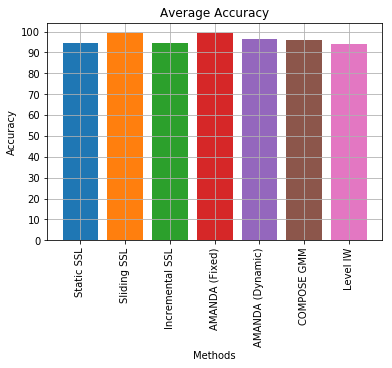

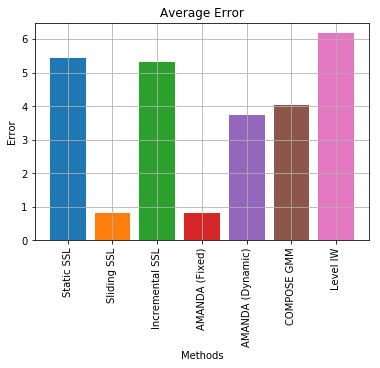

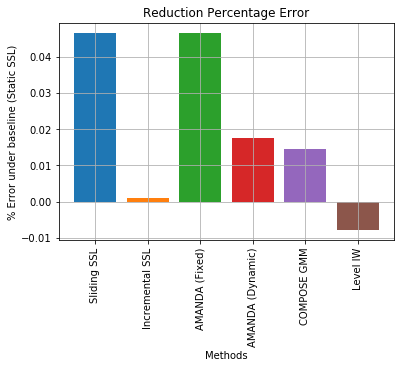

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadGEARS_2C_2D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 12, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 12, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 12, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 12, 0.55, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 12)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'GEARS_2C_2D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()